In [1]:
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
from find_nearest import find_nearest
import h5py
from read_funcs import make_rgb_dc,AOI
from matplotlib_scalebar.scalebar import ScaleBar
from cd_funcs import cva,c2va,diffs
from img_list import use_cases

In [33]:
path_l2d = '../DATABASE/'
use_case='Po_01'

In [34]:
# Set to True to show plots, save them, and/or save processed files
make_plots = True
save_plots = True
save_files = True

In [35]:
#setting use case parameters
name_case_study=use_case
threshold=use_cases[use_case][4]
bandcva_x=use_cases[use_case][6][0]
bandcva_y=use_cases[use_case][6][1]
diff_band=use_cases[use_case][7]

In [36]:
#t1 = np.load(path_l2d+'iimg1_v_'+name_case_study+'.npy')
#t2 = np.load(path_l2d+'Im2recalee_vrf_green_'+name_case_study+'.npy')
#vwl = np.load(path_l2d+'vwl_'+name_case_study+'.npy')

t1 = np.load(path_l2d+'iimg1_'+name_case_study+'.npy')
t2 = np.load(path_l2d+'Im2recalee_'+name_case_study+'.npy')
vwl = np.load(path_l2d+'wl_total_'+name_case_study+'.npy')
intx=np.load(path_l2d+'long_'+name_case_study+'.npy')
inty=np.load(path_l2d+'lat_'+name_case_study+'.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


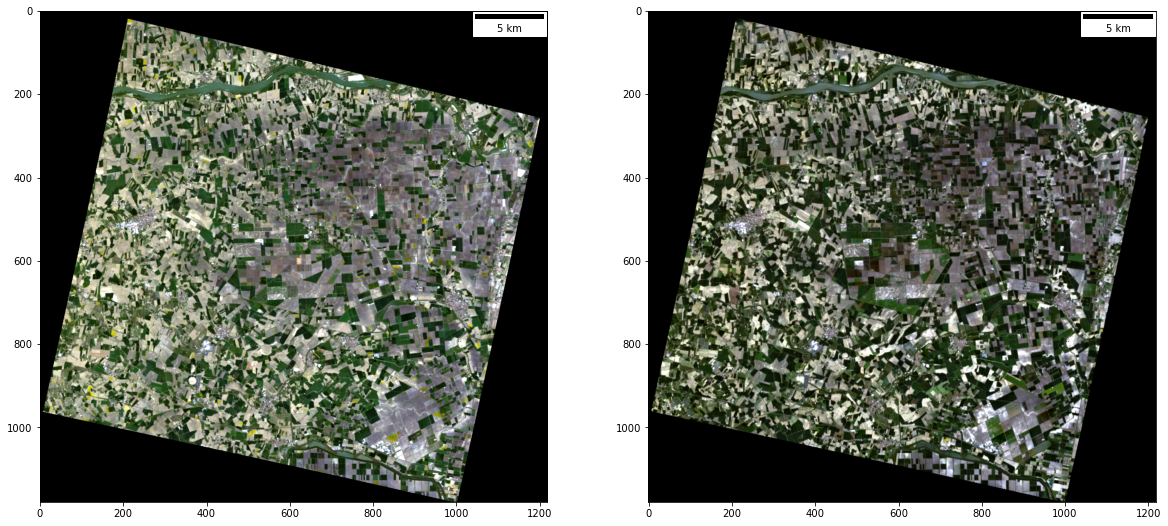

In [37]:
#plot coregistered input data
rgb1 = make_rgb_dc(t1,vwl)
rgb2 = make_rgb_dc(t2,vwl)

if make_plots is True:

    plt.figure(figsize=(20,20))

    plt.subplot(2,2,1)
    plt.imshow(rgb1)
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,2)
    #threshold=0.2
    #rgb2[rgb2>threshold]=threshold
    #rgb2=rgb2/threshold
    plt.imshow(rgb2)
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)
    #np.max(rgb2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the datacube is now cropped to the new AOI
those are the new sizes:
(80, 300, 230)
(80, 300, 230)


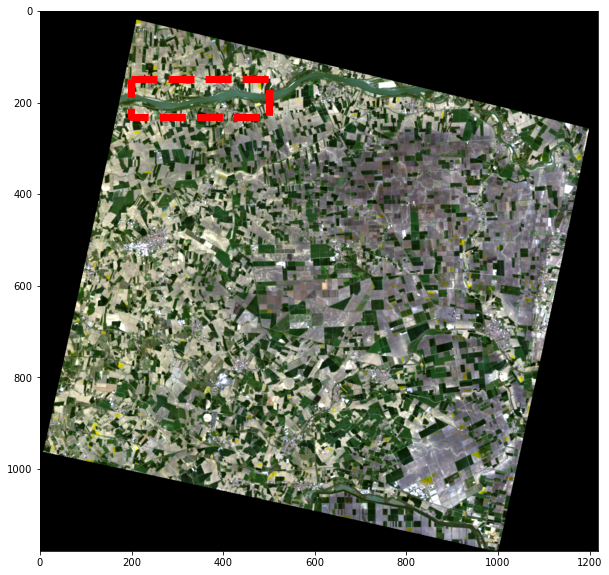

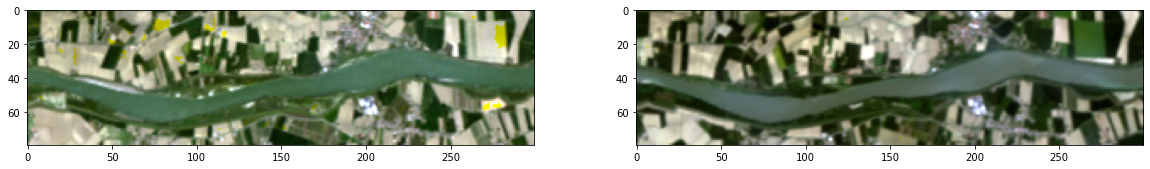

In [38]:
# selecting the AOI of CD
rgb1,rgb2,t1,t2,xcrop,ycrop=AOI(t1,t2,vwl, long=intx, lat=inty,key=use_case,coreg=False)

In [39]:
if save_files is True:
    np.save(path_l2d+'lat_cd_'+name_case_study, ycrop)
    np.save(path_l2d+'long_cd_'+name_case_study, xcrop) 

### C2VA

In [ ]:
# If the arrays are already stored in the DATABASE directory you can just load them instead of computing them
magc2va = np.load(path_l2d+'magc2va_'+name_case_study+'.npy')
angc2va = np.load(path_l2d+'angc2va_'+name_case_study+'.npy')
binary_c2va = np.load(path_l2d+'binary_c2va_'+name_case_study+'.npy')

In [41]:
magc2va, angc2va=c2va(vwl, vwl, t1, t2)

In [42]:
binary_c2va=np.where(magc2va>np.percentile(magc2va,threshold),1,0)

In [43]:
np.shape(binary_c2va)

(80, 300)

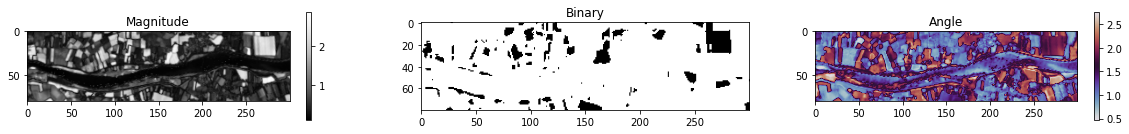

In [44]:
if make_plots is True:

    plt.figure(figsize=(20,2))
    plt.subplot(1,3,1)
    plt.imshow(magc2va,cmap='Greys_r')
    plt.colorbar()
    plt.title("Magnitude")
    #scalebar = ScaleBar(30) # 1 pixel = 30 meter
    #plt.gca().add_artist(scalebar)

    plt.subplot(1,3,2)
    plt.imshow(binary_c2va,cmap='binary')
    plt.title("Binary")

    plt.subplot(1,3,3)
    plt.imshow(angc2va,cmap='twilight')
    plt.colorbar()
    plt.title("Angle")
    
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_mag_binary_angle_c2va.png')

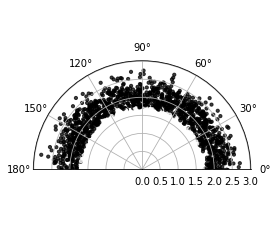

In [45]:
theta = np.ravel(angc2va)*180./np.pi #np.linspace(0,np.pi)
r = np.ravel(magc2va) #np.sin(theta)

if make_plots is True:
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    c = ax.scatter(theta, r, c=binary_c2va.ravel(), s=10, cmap='binary', alpha=0.75)

    ax.set_thetamin(0)
    ax.set_thetamax(180)
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_polarc2va.png')

In [46]:
if save_files is True:
    np.save(path_l2d+'magc2va_'+name_case_study, magc2va)
    np.save(path_l2d+'angc2va_'+name_case_study, angc2va) 
    np.save(path_l2d+'binary_c2va_'+name_case_study, binary_c2va)

### CVA

In [ ]:
magcva = np.load(path_l2d+'magcva_'+name_case_study+'.npy')
angcva = np.load(path_l2d+'angcva_'+name_case_study+'.npy')
binary_cva = np.load(path_l2d+'binary_cva_'+name_case_study+'.npy')

In [47]:
magcva,angcva=cva(vwl, vwl, t1, t2, bandcva_x, bandcva_y)

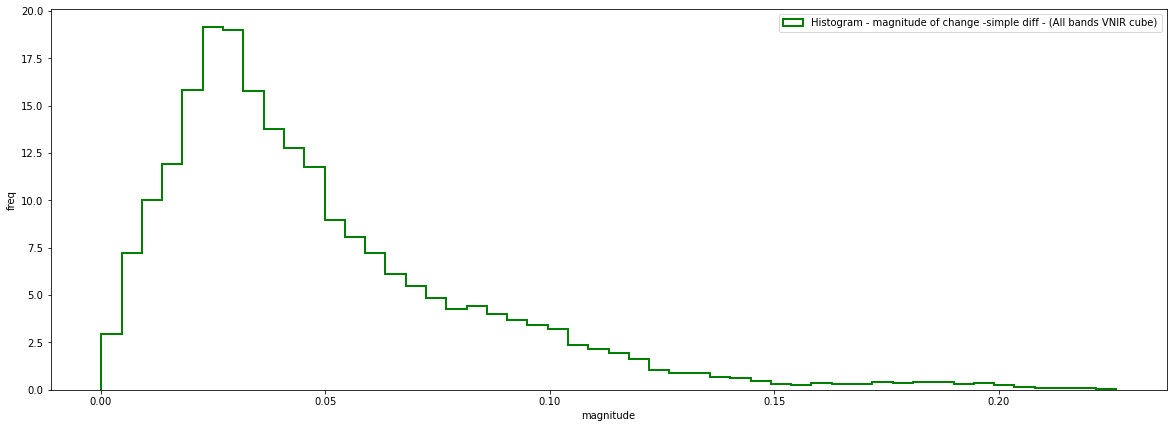

In [48]:
if make_plots is True:
    plt.figure(figsize=[20,7])

    plt.hist(magcva.ravel(),density='True',histtype='step',color="green",bins=50, linewidth=2, label="Histogram - magnitude of change -simple diff - (All bands VNIR cube)")

    plt.xlabel("magnitude")
    plt.ylabel("freq")
    plt.legend()
    #plt.xlim([0,0.23])

In [49]:
binary_cva=np.where(magcva>np.percentile(magcva,threshold),1,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


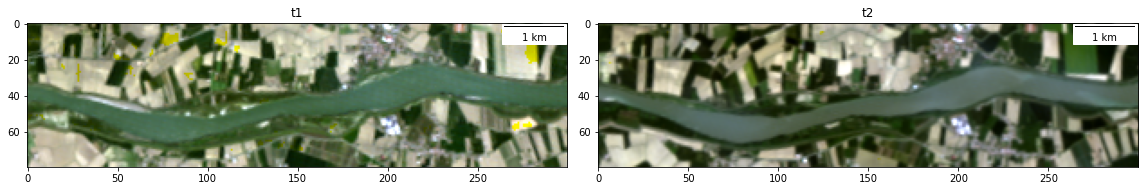

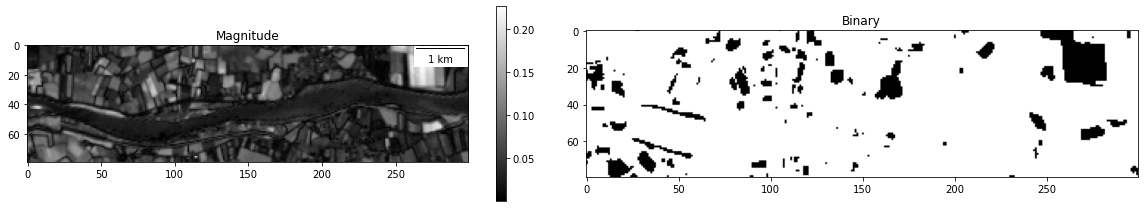

In [50]:
if make_plots is True:
    plt.figure(figsize=[16,3])

    plt.subplot(1,2,1)
    plt.title("t1")
    plt.imshow(rgb1)
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(1,2,2)
    plt.title("t2")
    plt.imshow(rgb2)
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)
    plt.tight_layout()
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_rgb_cd.png')

    plt.figure(figsize=[16,3])

    plt.subplot(1,2,1)
    plt.title("Magnitude")
    plt.imshow(magcva,cmap='gray')
    plt.colorbar()
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(1,2,2)
    plt.title("Binary")
    plt.imshow(binary_cva,cmap='binary')
    plt.tight_layout()
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_mag_binary_cva.png')

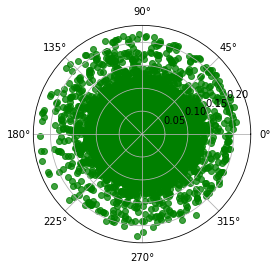

In [51]:
if make_plots is True:
    fig1 = plt.figure(figsize=[4,4])
    ax1 = fig1.add_subplot(projection='polar')
    c1 = ax1.scatter(angcva.ravel(), magcva.ravel(),c="green", cmap='hsv', alpha=0.75)
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_polarcva.png')

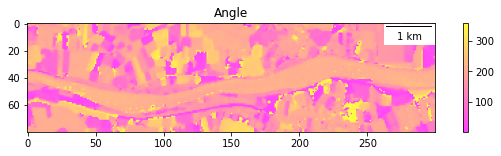

In [52]:
if make_plots is True:
    plt.figure(figsize=[10,2])
    plt.imshow(angcva, cmap='spring', alpha=0.75)
    plt.colorbar()
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)
    plt.title("Angle")
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_anglecva.png')

In [53]:
if save_files is True:
    np.save(path_l2d+'magcva_'+name_case_study, magcva)
    np.save(path_l2d+'angcva_'+name_case_study, angcva)
    np.save(path_l2d+'binary_cva_'+name_case_study, binary_cva)

### Difference Indices

In [ ]:
sdif = np.load(path_l2d+'sdif_'+name_case_study+'.npy')
logr = np.load(path_l2d+'logr_'+name_case_study+'.npy')
glrt = np.load(path_l2d+'glrt_'+name_case_study+'.npy')
coss = np.load(path_l2d+'coss_'+name_case_study+'.npy')

binary_sdif = np.load(path_l2d+'binary_sdif_'+name_case_study+'.npy')
binary_logr = np.load(path_l2d+'binary_logr_'+name_case_study+'.npy')
binary_glrt = np.load(path_l2d+'binary_glrt_'+name_case_study+'.npy')
binary_coss = np.load(path_l2d+'binary_coss_'+name_case_study+'.npy')

In [54]:
bsel = diff_band

In [55]:
# Standard difference
sdif = diffs(vwl, t1, t2, bsel=bsel, mode='sdif')

In [56]:
# Log-ratio
logr = diffs(vwl, t1, t2, bsel=bsel, mode='logr')

In [57]:
# Generalized likelihood ratio
glrt = diffs(vwl, t1, t2, bsel=bsel, mode='glrt')

In [58]:
# Cosine similarity
coss = diffs(vwl, t1, t2, mode='coss')

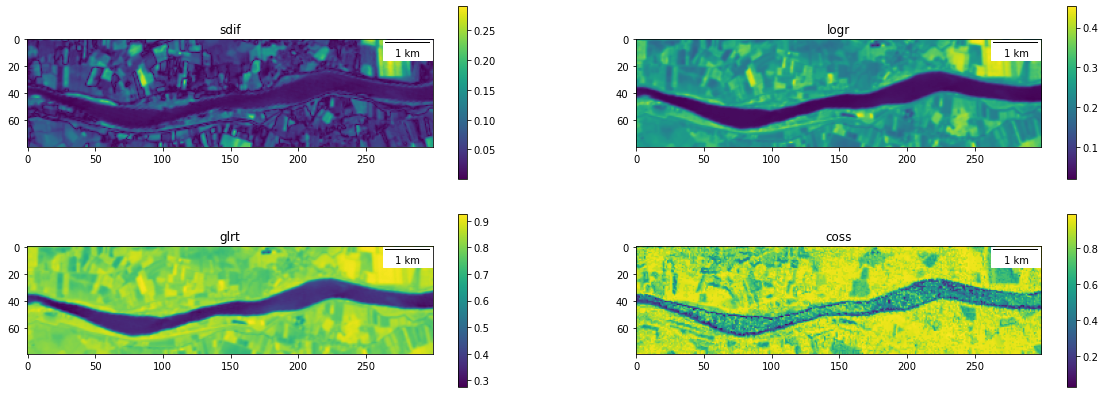

In [59]:
if make_plots is True:
    plt.figure(figsize=(20,7))
    plt.subplot(2,2,1)
    plt.title("sdif")
    plt.imshow(np.abs(sdif))
    plt.colorbar(orientation='vertical')
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,2)
    plt.title("logr")
    plt.imshow(logr)
    plt.colorbar(orientation='vertical')
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,3)
    plt.title("glrt")
    plt.imshow(glrt)
    plt.colorbar(orientation='vertical')
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,4)
    plt.title("coss")
    plt.imshow(coss)
    plt.colorbar(orientation='vertical')
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)
    
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_single_log_GLRT_cos_magnitude.png')

In [60]:
binary_sdif=np.where(sdif>np.percentile(sdif,threshold),1,0)
binary_logr=np.where(logr>np.percentile(logr,threshold),1,0)
binary_glrt=np.where(glrt>np.percentile(glrt,threshold),1,0)
binary_coss=np.where(coss>np.percentile(coss,threshold),1,0)

In [61]:
np.shape(sdif)

(80, 300)

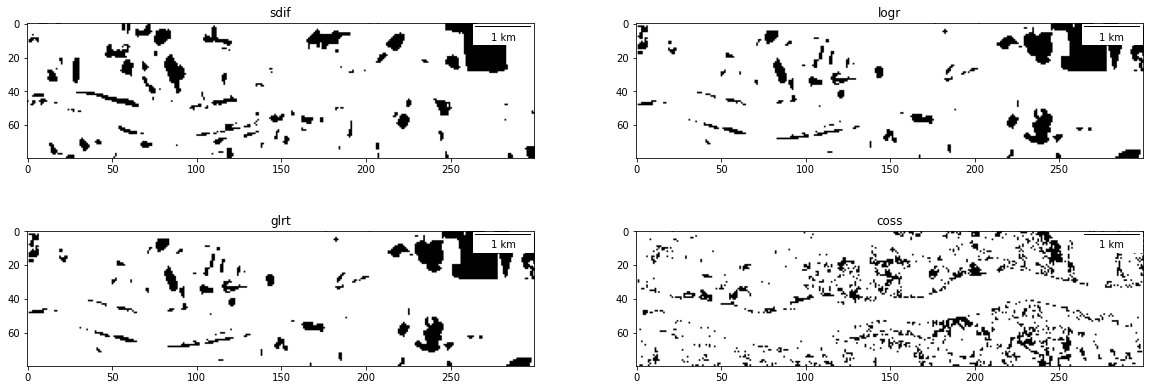

In [62]:
if make_plots is True:
    plt.figure(figsize=(20,7))
    plt.subplot(2,2,1)
    plt.title("sdif")
    plt.imshow(binary_sdif, cmap="binary")
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,2)
    plt.title("logr")
    plt.imshow(binary_logr, cmap="binary")
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,3)
    plt.title("glrt")
    plt.imshow(binary_glrt, cmap="binary")
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,4)
    plt.title("coss")
    plt.imshow(binary_coss, cmap="binary")
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_single_log_GLRT_cos_binary.png')

In [63]:
if save_files is True:
    np.save(path_l2d+'sdif_'+name_case_study, sdif)
    np.save(path_l2d+'logr_'+name_case_study, logr) 
    np.save(path_l2d+'glrt_'+name_case_study, glrt)
    np.save(path_l2d+'coss_'+name_case_study, coss)

    np.save(path_l2d+'binary_sdif_'+name_case_study, binary_sdif)
    np.save(path_l2d+'binary_logr_'+name_case_study, binary_logr) 
    np.save(path_l2d+'binary_glrt_'+name_case_study, binary_glrt)
    np.save(path_l2d+'binary_coss_'+name_case_study, binary_coss)